In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [2]:
%autosave 0
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

Autosave disabled


# Unidad 2: Computación científica con Python


En la **Unidad 1** estudiamos el *stack* de librerías de **Python 3** para 
- Lectura y procesamiento de datos 
- Manipulación numérica de datos
- Visualización de datos

Estos son los ingredientes para resolver problemas de matemáticas aplicadas y ciencias de la computación

En las próximas clases nos enfocaremos en un problema tal vez simple pero que se encuentra en casi todas las ciencias: **resolver sistemas de ecuaciones**

***

# Sistemas de ecuaciones lineales

Comenzaremos con los sistemas más simples: **Sistemas lineales en sus parámetros**

$$
\begin{align}
a_{11} x_{1} + a_{12} x_{2} + \ldots + a_{1N} x_N &= b_1 \nonumber \\
a_{21} x_{1} + a_{22} x_{2} + \ldots + a_{2N} x_N &= b_2  \nonumber \\
\vdots  \nonumber \\
a_{M1} x_{1} + a_{M2} x_{2} + \ldots + a_{MN} x_N &= b_M  \nonumber \\
\end{align}
$$

- Este es un sistema con $N$ incognitas y $M$ ecuaciones
- Existen $NM + M$ parámetros que asumimos conocidos
- Se puede escribir como un sistema matricial
$$
A x = b
$$
- ¿Cómo se resuelve un sistema de este tipo?


### Ejemplo

Sea el siguiente sistema

$$
\begin{align}
-x_{1} + 5 x_{2} &= 2 \nonumber \\
2 x_{1} + 3 x_{2} &= 1  \nonumber 
\end{align}
$$

¿Cúantas ecuaciones e incognitas tiene? ¿Cúantos parámetros tiene?

Cómo se ve geométricamente este sistema? ¿Cúal es la solución?

<IPython.core.display.Javascript object>


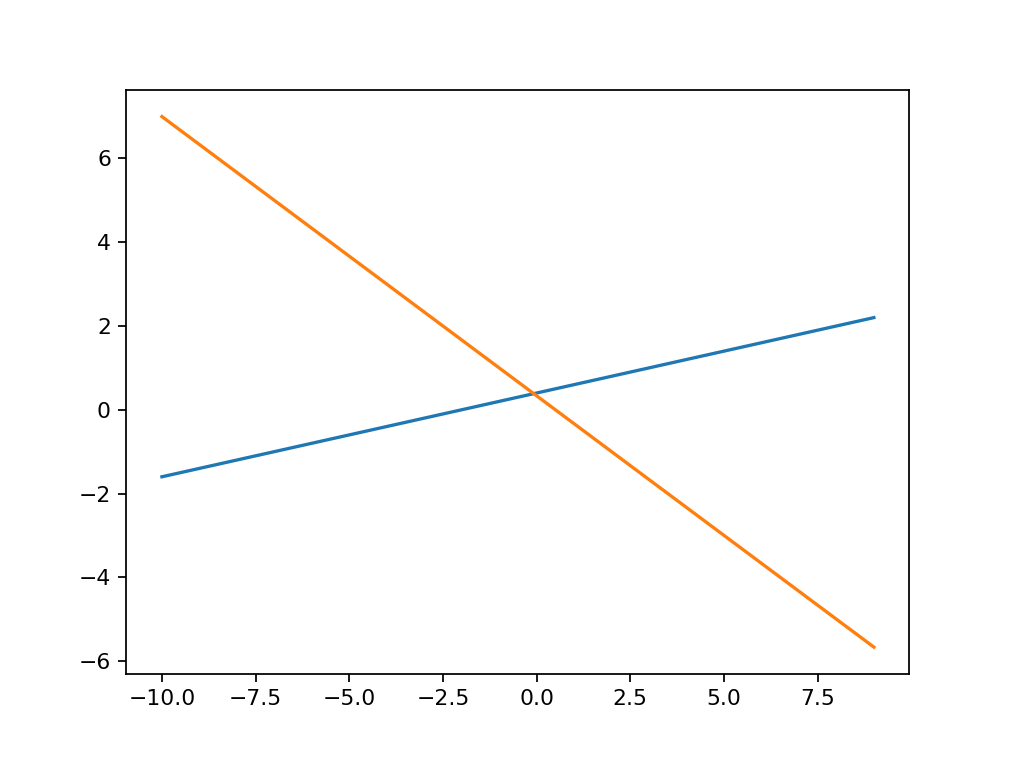

In [23]:
# Resolving geometricly

fig, ax = plt.subplots()

x_1 = np.arange(-10,10)

x_2 = (x_1+2)/5

x_3 = (1-2*x_1)/3

ax.plot(x_1,x_2)
ax.plot(x_1, x_3)

In [21]:
-(-0.048) + 5*0.329

2*(-0.048)+3*0.329

0.8910000000000001

In [38]:
# Resolving using inverse matrix
# A*x = b
A = np.array([[-1, 5],
            [2, 3]])

b = np.array([[2],[1]])

det = np.linalg.det(A)

print(det)

x = np.dot(np.linalg.inv(A), b)

print('Solution:\nx1: {0}\nx2: {1}'.format(x[0,0], x[1,0]))

-13.0
Solution:
x1: -0.07692307692307698
x2: 0.38461538461538464


<IPython.core.display.Javascript object>


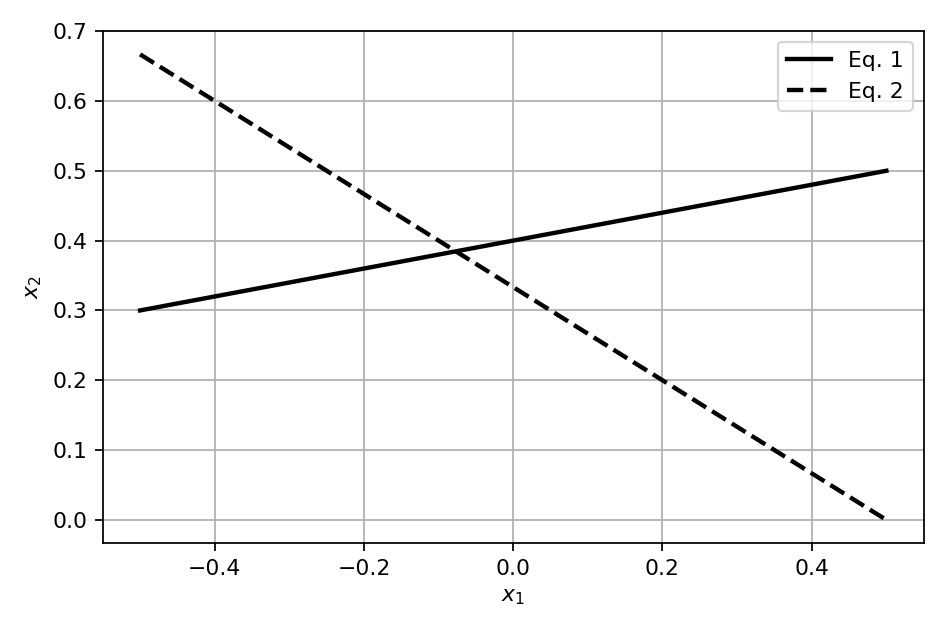

In [22]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
x1 = np.linspace(-0.5, 0.5, num=100)
x2_1 = (2 + x1)/5
x2_2 = (1 - 2*x1)/3
ax.plot(x1, x2_1, 'k-', lw=2, label='Eq. 1')
ax.plot(x1, x2_2, 'k--', lw=2, label='Eq. 2')
ax.grid(); ax.legend();
ax.set_xlabel(r'$x_1$'); ax.set_ylabel(r'$x_2$');

## Sistema cuadrado

Este es un caso particular conocido como **sistema cuadrado** donde $N=M$

Estos sistemas pueden resolverse usando

$$
x = A^{-1} b
$$

donde $A A^{-1} = I$

# Algebra lineal con NumPy y SciPy

Numpy nos ofrece el módulo [`linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) con funciones de algebra lineal

En particular veremos la sección *Solving equations and inverting matrices*

Para más funciónes podemos usar el modulo [`linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) de SciPy

#### Invirtiendo una matriz con `linalg`

In [ ]:
np.linalg.inv?

In [ ]:
A = np.array([[-1, 5],[2,3]])
b = np.array([2, 1])

np.dot(np.linalg.inv(A), b)

En este caso la inversa se podía calcular como
$$
A = \begin{pmatrix} a,b \\c,d\end{pmatrix} \quad A^{-1} = \frac{1}{|A|}  \begin{pmatrix} d,-c \\-b,a\end{pmatrix} 
$$

donde $|A| = ad - bc$ es el determinante de $A$

En el caso general usaríamos [eliminación gaussiana](https://en.wikipedia.org/wiki/Gaussian_elimination)
***
El sistema tiene solución siempre y cuando $A$ sea invertible (no-singular) 

¿Cómo verificamos que $A\in \mathbb{R}^{N\times N}$ es invertible?
- Determinante distinto de cero
- Rango igual a $N$  (El rango de una matriz es el número de columnas LI)

Si esto no se cumple $A$ no se puede invertir 

#### Calculando el determinante con `linalg`

In [ ]:
np.linalg.det?

In [ ]:
np.linalg.det(A)

### Ejemplo: Sistema sin solución

$$
\begin{align}
x_{1} + 5 x_{2} &= 2 \nonumber \\
2 x_{1} + 10 x_{2} &= 6  \nonumber 
\end{align}
$$

### Ejemplo: Sistema con infinitas soluciones

$$
\begin{align}
x_{1} + 5 x_{2} &= 2 \nonumber \\
2 x_{1} + 10 x_{2} &= 4  \nonumber 
\end{align}
$$

0.0


<IPython.core.display.Javascript object>


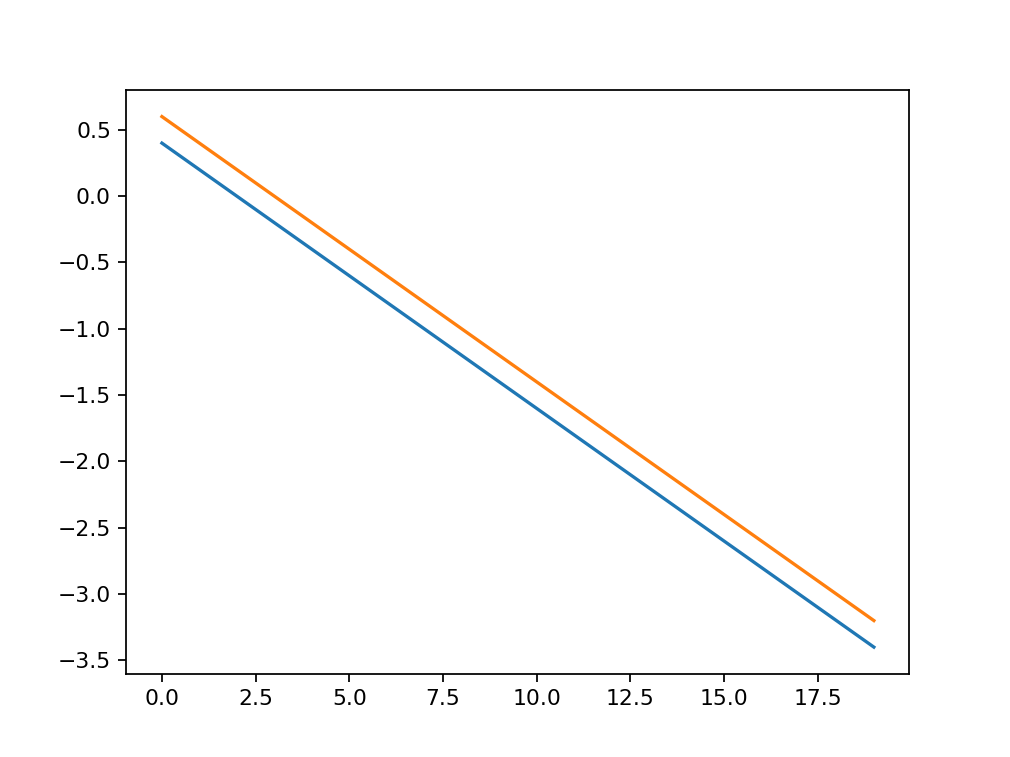

In [73]:
A = np.array([[1,5], [2, 10]])

print(np.linalg.det(A))

x1 = np.arange(0,20)

x2 = (2-x1)/5

x3 = (6-2*x1)/10

fix, ax = plt.subplots()

ax.plot(x1, x2)

ax.plot(x1, x3)

0.0
1


<IPython.core.display.Javascript object>


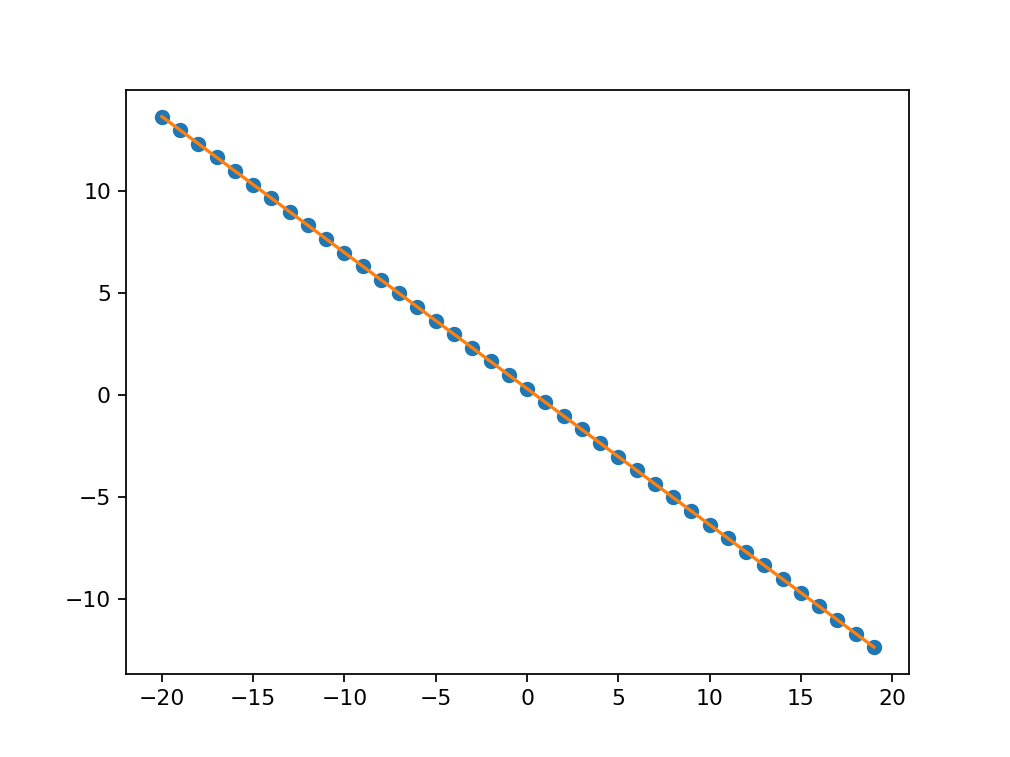

In [74]:
A = np.array([[2,3],[10,15]])

print(np.linalg.det(A))
print(np.linalg.matrix_rank(A))

x1 = np.arange(-20,20)

x2 = (1-2*x1)/3

x3 = (5-10*x1)/15

fig, ax = plt.subplots()

ax.plot(x1, x2, 'o')
ax.plot(x1,x3)

In [75]:
A = np.array([[1, 5],[2,10]])
b = np.array([2, 6])
display("Determinante: {0}".format(np.linalg.det(A)))
# np.dot(np.linalg.inv(A), b)

'Determinante: 0.0'

<IPython.core.display.Javascript object>


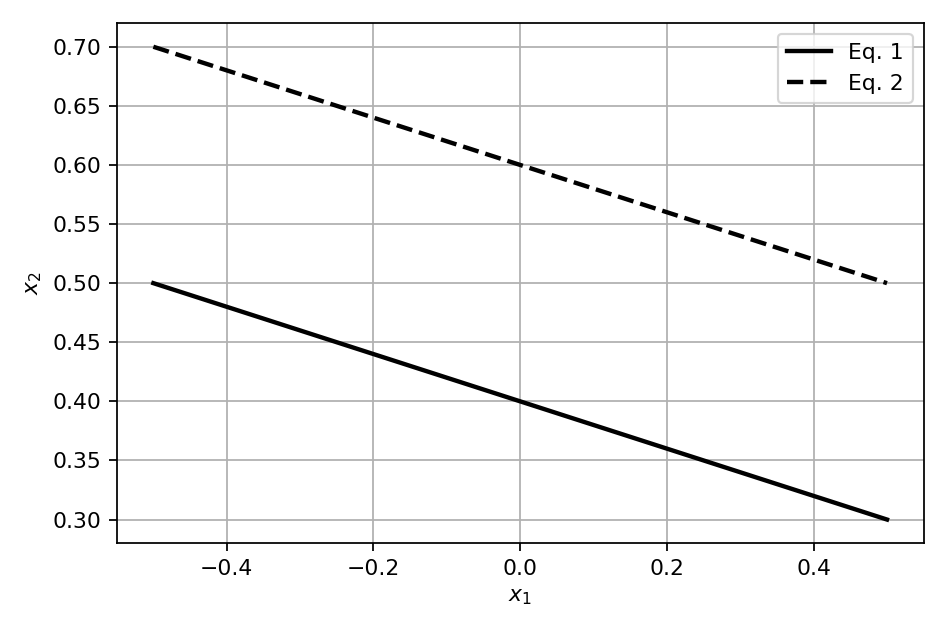

In [52]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
x1 = np.linspace(-0.5, 0.5, num=100)
x2_1 = (2 - x1)/5
x2_2 = (6 - 2*x1)/10
ax.plot(x1, x2_1, 'k-', lw=2, label='Eq. 1')
ax.plot(x1, x2_2, 'k--', lw=2, label='Eq. 2')
ax.grid(); ax.legend();
ax.set_xlabel(r'$x_1$'); ax.set_ylabel(r'$x_2$');

Incluso con determinante distinto de cero podríamos no ser capaces de resolver un sistema numéricamente sin errores

#### Análisis de errores

Imaginemos una pequeña variación en $b$, $\delta b$ que a su vez provoca una pequeña variación en $x$, $\delta x$

Se puede encontrar una cota que compara el error relativo de $b$ y $x$

$$
\frac{\| \delta x \|}{\|x\|} \leq \frac{\| A^{-1} \|  \|\delta b\|}{\|x\|}  = \|A^{-1}\| \|A\| \frac{\| \delta b \|}{\|b\|} 
$$
donde se uso que $A \delta x = \delta b$ (linealidad)

Esto significa que un pequeño error relativo en $b$ puede causar un gran error en $x$ 

El estimador de $\|A^{-1}\| \|A\|$ se llama *condition number*

#### Condition number

Un sistema se dice "bien condicionado" si este valor es cercano a $1$. Si es mucho mayor a $1$ el sistema es "mal condicionado"

A veces se retorna el recíproco del *condition number*: *RCOND*

In [ ]:
np.linalg.cond?

In [76]:
A

array([[ 1,  5],
       [ 2, 10]])

In [78]:
A = np.array([[-1, 5],[2,3]])
b = np.array([2, 1])

np.linalg.cond(A, p = 'fro')
#np.linalg.cond(A, p='fro')

3.0

In [79]:
A = np.arange(9).reshape(3, 3)
np.linalg.cond(A, p='fro')

inf

#### Norma de una matriz con `linalg`

De forma similar a los vectores se puede definir una norma para medir el "tamaño" de una matriz

La más típica es la [norma de Frobenius](https://www.sciencedirect.com/topics/engineering/frobenius-norm)
$$
\|A \|_F = \sqrt{\sum_{i,j} a_{ij}^2}
$$

In [80]:
np.linalg.norm(A, ord='fro')

14.2828568570857

### Resolviendo sistemas cuadrados y  lineales eficientemente

En general nos interesa $x$ más que $A^{-1}$

En particular si un sistema de ecuaciones es grande es mala idea calcular la inversa (muy costoso)

`linalg` tiene la función `solve` que obtiene $x$ de forma más eficiente

In [81]:
np.linalg.solve?

In [82]:
N = 2000
A = np.random.rand(N, N)
b = np.random.rand(N, 1)
%timeit -n10 np.linalg.inv(A)

KeyboardInterrupt: 

In [83]:
%timeit -n10 np.linalg.solve(A, b)

109 ms ± 44.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [84]:
np.allclose(np.linalg.solve(A, b), np.dot(np.linalg.inv(A), b))

True

¿Por qué `solve` es más rápido que `inv`+`dot`?

`solve` realiza internamente una factorización

$$
\begin{align}
A x &= b \nonumber \\
LU x &= b \nonumber \\
L z &= b \nonumber
\end{align}
$$

Donde $L$ es una matriz triangular inferior (lower) y $U$ es una matriz triangular superior (upper)

$$
L = \begin{pmatrix} 
l_{11} & 0 & 0 & \ldots & 0 & 0 \\ 
l_{21} & l_{22} & 0 &\ldots & 0 & 0 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
l_{N1} & l_{N2} & l_{N3} & \ldots & l_{N(N-1)} & l_{NN} \\ 
\end{pmatrix} \quad
U = \begin{pmatrix} 
u_{11} & u_{11} & u_{13} & \ldots & u_{1(N-1)} & u_{1N} \\ 
u_{21} & u_{22} & u_{32} &\ldots & u_{2(N-1)} & 0 \\ 
\vdots & \vdots & \vdots &\ldots & \ddots & \vdots \\
u_{N1} & 0 & 0 & \ldots & 0 & 0\\ 
\end{pmatrix}
$$

Luego $z$ se puede obtener recursivamente

$$
z_1 = \frac{b_1}{l_{11}}
$$
$$
z_2 = \frac{b_2 - l_{21} z_1}{l_{22}}
$$
$$
z_i = \frac{b_i - \sum_{j=1}^{i-1} l_{ij} z_j}{l_{ii}}
$$

y $x$ se puede obtener recursivamente de $z$

La librería `scipy` nos ofrece en su modulo `linalg` la función `lu` para factorizar

In [ ]:
import scipy.linalg
scipy.linalg.lu?

In [ ]:
A = np.array([[-1, 5],[2,3]])
P, L, U = scipy.linalg.lu(A, permute_l=False)
display(L, U)

### Need for speed

NumPy y SciPy se compilan contra las librerías [BLAS](http://www.netlib.org/blas/) y [LAPACK](http://www.netlib.org/lapack/) del sistema

Existen varias implementaciones de BLAS/LAPACK que son enfocadas en eficiencia
1. [OpenBLAS](https://www.openblas.net/)
1. Intel [MKL](https://software.intel.com/en-us/mkl)
1. [ATLAS](http://math-atlas.sourceforge.net/)



- [Comparación entre ATLAS OpenBLAS y MKL](http://blog.nguyenvq.com/blog/2014/11/10/optimized-r-and-python-standard-blas-vs-atlas-vs-openblas-vs-mkl/)
- [Guía de instalación de MKL con conda](https://software.intel.com/en-us/articles/using-intel-distribution-for-python-with-anaconda)

In [ ]:
np.__config__.show()

In [ ]:
!ldd /usr/lib/python3.7/site-packages/numpy/linalg/lapack_lite.cpython-37m-x86_64-linux-gnu.so

## Sistema rectangular

Si tenemos un sistema 

- sobredeterminado: con más ecuaciones que incognitas
- infradeterminado: con más incognitas que ecuaciones
- incognitas: grados de libertad
- ecuaciones: restricciones

ya no podemos calcular la inversa

Sea entonces 
$$
A x +b 
$$
donde $A\in \mathbb{R}^{M\times N}$, $x\in \mathbb{R}^{N}$ y $b \in \mathbb{R}^{M}$

### Sistema sobre determinado

Asumamos $N < M$ 

En este caso podemos encontrar una solución aproximada minimizando la suma de errores cuadráticos

$$\
\min_x \sum_{i=1}^M e_i^2 
$$
donde $e_i = \sum_{j=1}^N a_{ij} x_j - b_i$

Esto se conoce como el **Problema de mínimos cuadrados**

$$
\begin{align}
\frac{d}{dx} \|Ax - b \|_F^2 &= \frac{d}{dx}  (A x - b)^T (A x -b) \nonumber \\
 &= 2 A^T (A x -b) \nonumber \\
&= 2A^T A x - 2A^T b = 0 \nonumber \\
\rightarrow \hat x &= (A^T A)^{-1} A^T b
\end{align}
$$

donde $A^{\dagger} = (A^T A)^{-1} A^T$ se conoce como la pseudo-inversa de [Moore-Penrose](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse)

Que está implementada en `linalg.pinv`

Y la solución de mínimos cuadrádos está implementada en [`linalg.lstsq`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html)

In [100]:
A = np.array([[1, 2], [2, 3], [4, 1]])

b = np.array([[5], [3], [5]])

# Using pseudo inverse
A_inv = np.linalg.pinv(A)

x = np.dot(A_inv, b)

# Testing results

print(x[0]+x[1])
print(2*x[0]+3*x[1])
print(4*x[0]+x[1])

[1.85333333]
[4.58666667]
[4.77333333]


In [102]:
x = np.linalg.lstsq(A, b)

x

/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([[0.97333333],
        [0.88      ]]),
 array([7.70666667]),
 2,
 array([5.47722558, 2.23606798]))

## Actividad: Ajustando una recta

Encuentre los parámetros de la **ecuación de la recta** que ajuste mejor los datos 

$$
y = \theta_1 x + \theta_2
$$

- Identifique y construya el vector $b$ y la matriz $A$ ¿Cuánto vale $N$ y $M$?
- ¿Es este un sistema cuadrado o rectangular? ¿ Es sobre o infra-determinado?
- Encuentre $\theta_1$ y $\theta_2$ que minimiza la suma de errores cuadráticos
    - Encuentre la pseudo inversa y luego use dot
    - Use lstsq
    - ¿Cúal método es más eficiente?
- Grafique la recta encontrada

<IPython.core.display.Javascript object>


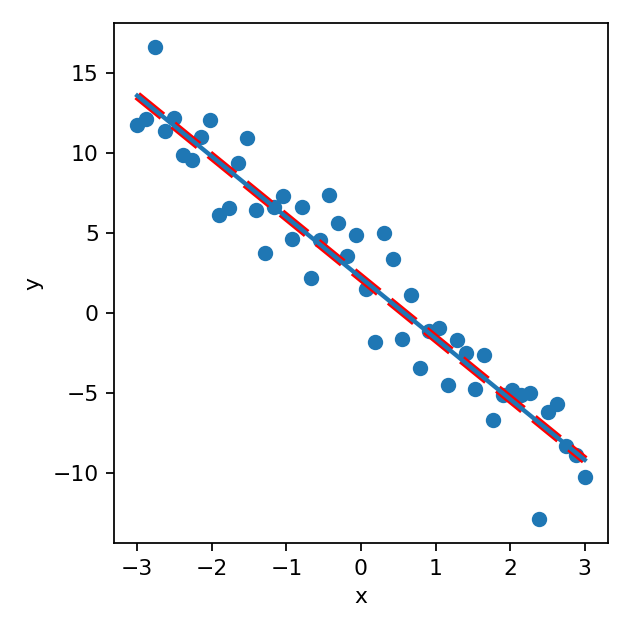

In [170]:
m = 50
x = np.linspace(-3, 3, num=m).reshape((m,1))
y = -4*x + 2 + 2*np.random.randn(len(x)).reshape((m,1))

# A*x = b
ones = np.ones(m).reshape((m,1))

# A matrix
A = np.concatenate((x,ones),axis = 1)

# Computing using pseudo inv

# pseudo inverse A
A_pinv = np.linalg.pinv(A)
# Compute ẍ
x_aproximate = np.dot(A_pinv, y)

model = np.dot(A, x_aproximate)

# Compute using lstsq
lstsq = np.linalg.lstsq(A, y, rcond = None)
model_lstsq = np.dot(A, lstsq[0])


fig, ax = plt.subplots(figsize=( 4, 4), tight_layout=True)
ax.scatter(x, y); 
ax.set_xlabel('x'); ax.set_ylabel('y');
ax.plot(x, model, '--r', linewidth = 4 )
ax.plot(x, model_lstsq, linewidth = 2)

In [168]:
%timeit -n10 np.dot(A, np.dot(np.linalg.pinv(A), y))

%timeit -n10 np.dot(A, np.linalg.lstsq(A, y, rcond = None)[0])


#lstsq = np.linalg.lstsq(A, y, rcond = None)
#model_lstsq = np.dot(A, lstsq[0])

23.8 ms ± 908 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
18.3 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Puede hacer lo mismo con el siguiente polinomio?

$$
y = \theta_2 x^2 + \theta_1 x + \theta_2
$$

[[ 1.00000000e+00 -3.00000000e+00  9.00000000e+00]
 [ 1.00000000e+00 -2.87755102e+00  8.28029988e+00]
 [ 1.00000000e+00 -2.75510204e+00  7.59058726e+00]
 [ 1.00000000e+00 -2.63265306e+00  6.93086214e+00]
 [ 1.00000000e+00 -2.51020408e+00  6.30112453e+00]
 [ 1.00000000e+00 -2.38775510e+00  5.70137443e+00]
 [ 1.00000000e+00 -2.26530612e+00  5.13161183e+00]
 [ 1.00000000e+00 -2.14285714e+00  4.59183673e+00]
 [ 1.00000000e+00 -2.02040816e+00  4.08204915e+00]
 [ 1.00000000e+00 -1.89795918e+00  3.60224906e+00]
 [ 1.00000000e+00 -1.77551020e+00  3.15243648e+00]
 [ 1.00000000e+00 -1.65306122e+00  2.73261141e+00]
 [ 1.00000000e+00 -1.53061224e+00  2.34277384e+00]
 [ 1.00000000e+00 -1.40816327e+00  1.98292378e+00]
 [ 1.00000000e+00 -1.28571429e+00  1.65306122e+00]
 [ 1.00000000e+00 -1.16326531e+00  1.35318617e+00]
 [ 1.00000000e+00 -1.04081633e+00  1.08329863e+00]
 [ 1.00000000e+00 -9.18367347e-01  8.43398584e-01]
 [ 1.00000000e+00 -7.95918367e-01  6.33486047e-01]
 [ 1.00000000e+00 -6.73469388e-

<IPython.core.display.Javascript object>


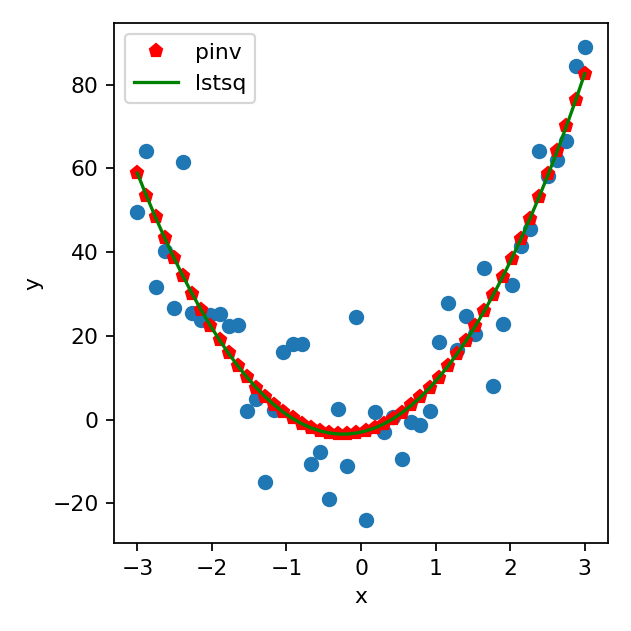

In [200]:
m = 50
x = (np.linspace(-3, 3, num=m).reshape((m,1)))
y = 5*x + 8*x**2 + 10*np.random.randn(len(x)).reshape((m,1))

ones = np.ones(m).reshape((m,1))
# A matrix
A = np.concatenate((ones, x, x**2), axis = 1).reshape((m,3))

print(A)
model = np.dot(A, np.dot(np.linalg.pinv(A), y))
model_lstsq = np.dot(A, np.linalg.lstsq(A, y, rcond = None)[0])

fig, ax = plt.subplots(figsize=( 4, 4), tight_layout=True)
ax.scatter(x, y); 
ax.set_xlabel('x'); ax.set_ylabel('y');
ax.plot(x, model,'pr', label = 'pinv')
ax.plot(x, model_lstsq, 'g', label = 'lstsq')
ax.legend()